In [40]:
import csv
import pandas as pd
import numpy as np
import glob
import qualities
import plotting_func
import matplotlib.pyplot as plt


In [ ]:
files = glob.glob("./QC-Bench-SGD/*")

In [ ]:
results = {} # [epochs][metrics]
for epoch in range(70):
    file = [f for f in files if "-" + str(epoch) + ".csv" in f]
    file = file[0]
    print(file)
    results[epoch] = qualities.correlate(file)

In [46]:
#Only want L2 and _0
plotting = {}
plotting['test'] = {}
plotting['gap' ] = {}
for x in results[epoch]['pearson']:
    if('test' in x and ('L2_0' in x or 'path' in x)):
        plotting['test'][x] = {}
    if('gap'  in x and ('L2_0' in x or 'path' in x)):
        plotting['gap' ][x] = {}

for epoch in range(70):
    for x in results[epoch]['pearson']:
        if('test' in x and ('L2_0' in x or 'path' in x)):
            plotting['test'][x][epoch] = results[epoch]['pearson'][x]
        if('gap'  in x and ('L2_0' in x or 'path' in x)):
            plotting['gap'][x][epoch] = results[epoch]['pearson'][x]
print(plotting['test'].keys())


dict_keys(['QS_BE_test_acc_L2_0', 'QS_AE_test_acc_L2_0', 'QE_BE_test_acc_L2_0', 'QE_AE_test_acc_L2_0', 'spec_BE_test_acc_L2_0', 'spec_AE_test_acc_L2_0', 'fro_BE_test_acc_L2_0', 'fro_AE_test_acc_L2_0', 'path_test_acc'])


In [42]:
#Only want L2 and _0, splits into AE and BE
plottingBE = {}
plottingBE['test'] = {}
plottingBE['gap' ] = {}

plottingAE = {}
plottingAE['test'] = {}
plottingAE['gap' ] = {}

for x in results[epoch]['pearson']:
    if('test' in x and 'L2_0' in x):
        plottingBE['test'][x] = {}
        plottingAE['test'][x] = {}

    if('gap'  in x and 'L2_0' in x):
        plottingBE['gap' ][x] = {}
        plottingAE['gap' ][x] = {}

#plottingBE['test']['path_test'] = results[epoch]['pearson']['path_test_acc']
#plottingBE['gap']['path_gap' ] = results[epoch]['pearson']['path_gap' ]

for epoch in range(70):
    for x in results[epoch]['pearson']:
        if('test' in x and 'L2_0' in x):
            if('BE' in x):
                plottingBE['test'][x][epoch] = results[epoch]['pearson'][x]
            elif('AE' in x):
                plottingAE['test'][x][epoch] = results[epoch]['pearson'][x]
        if('gap'  in x and ('L2_0' in x or 'path' in x)):
            if('BE' in x):
                plottingBE['gap'][x][epoch] = results[epoch]['pearson'][x]
            elif('AE' in x):
                plottingAE['gap'][x][epoch] = results[epoch]['pearson'][x]

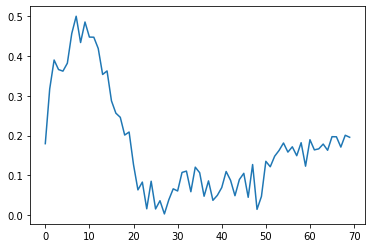

{}
dict_keys([])


In [56]:
for x in plottingAE['test']:
    

plt.plot(plottingAE['test']['QS_AE_test_acc_L2_0'].keys(), plottingAE['test']['QS_AE_test_acc_L2_0'].values(),)
plt.show()
print(plottingBE['test']['QS_AE_test_acc_L2_0'])
print(plottingBE['test']['QS_AE_test_acc_L2_0'].keys())
